File not found. Using the Titanic dataset for demonstration.
Column 'your_column_name' not found. Using the 'age' column from the Titanic dataset.
Parametric Measures:
Mean: 29.70
Standard Deviation: 14.53
Variance: 211.02

Non-Parametric Measures:
Median: 28.00
Mode: 24.00
IQR: 17.88


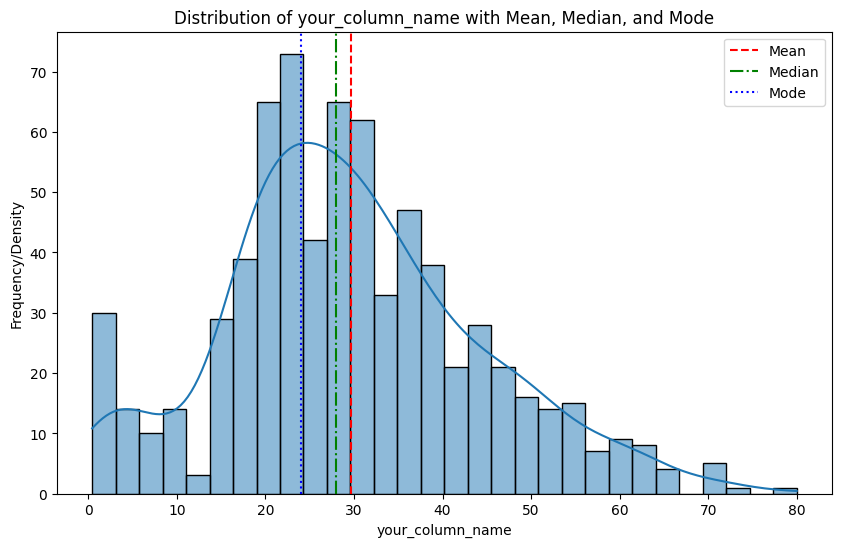

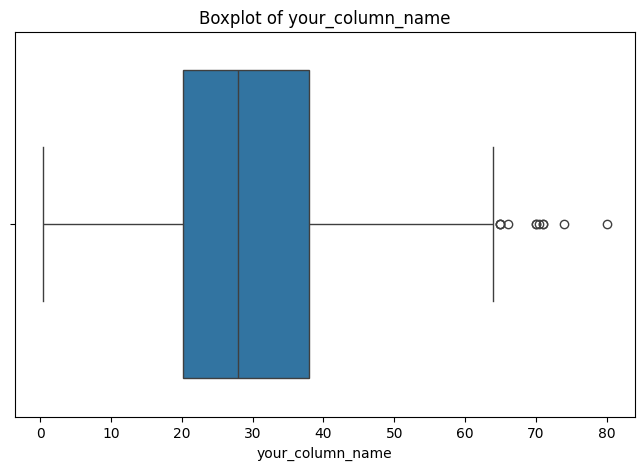

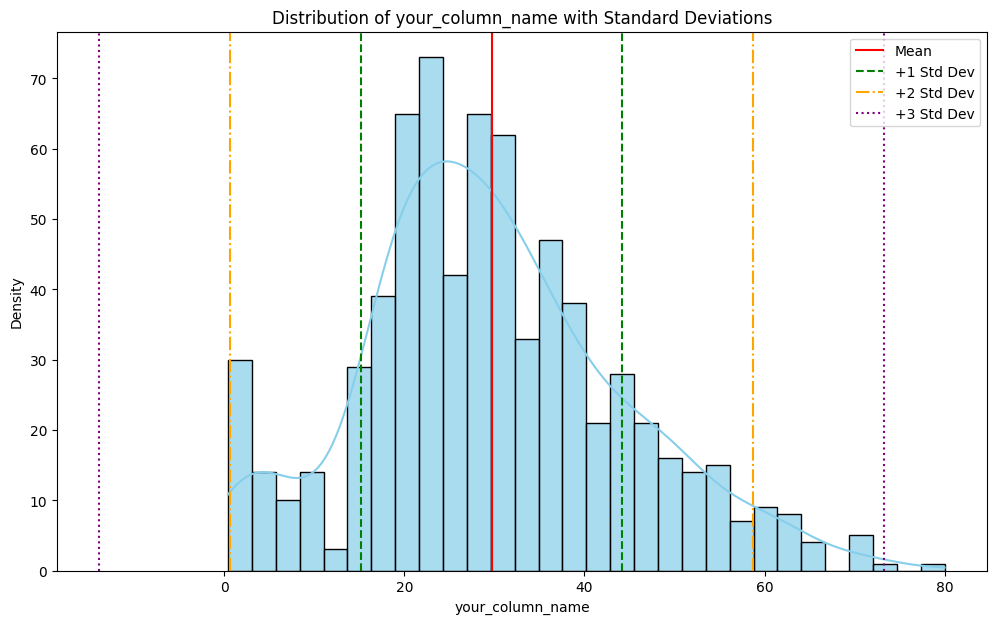


Z-Scores and Probabilities for Selected Values:
Value: 0.42, Z-Score: -2.02, Probability (<= Value): 0.0219
Value: 20.12, Z-Score: -0.66, Probability (<= Value): 0.2549
Value: 28.00, Z-Score: -0.12, Probability (<= Value): 0.4534
Value: 38.00, Z-Score: 0.57, Probability (<= Value): 0.7161
Value: 80.00, Z-Score: 3.46, Probability (<= Value): 0.9997


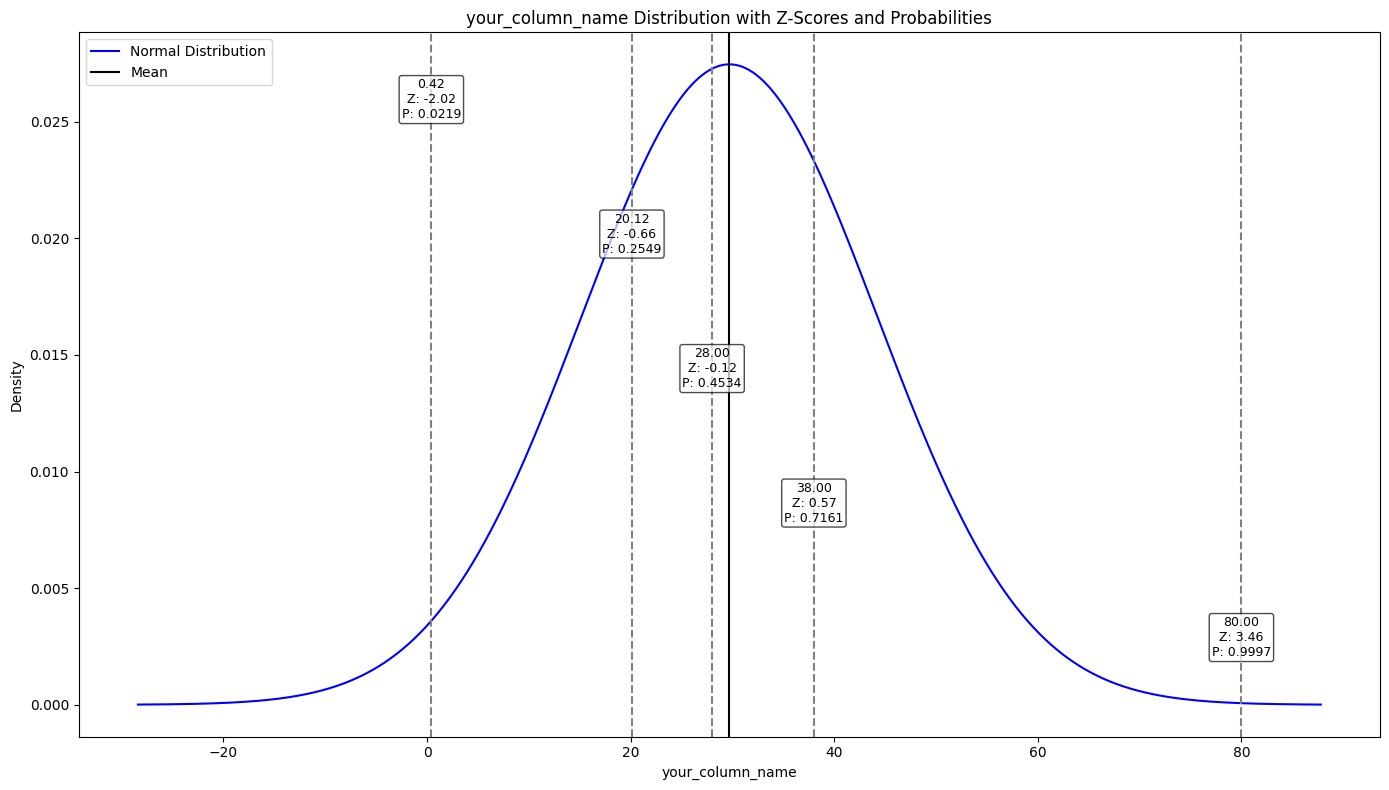

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, mode, iqr

# -------------------------------------------------------
# RECIPE: Descriptive Statistics and Visualization
# -------------------------------------------------------

# This recipe provides a step-by-step guide to calculating and visualizing
# descriptive statistics for a numerical variable in a Pandas DataFrame.

# --- INSTRUCTIONS ---
# 1. Replace 'your_dataset.csv' with the actual path to your dataset file.
# 2. Replace 'your_column_name' with the name of the column you want to analyze.
# 3. (Optional) Customize the selected values in Step 8.
# 4. (Optional) Customize plot titles, labels, and colors as needed.
# 5. Run the code.

# -------------------------------------------------------
# Step 1: Data Loading and Preparation
# -------------------------------------------------------

# Load your dataset (replace 'your_dataset.csv' with your file path)
# Supported file types: CSV, Excel, etc. (see pandas documentation)
try:
    df = pd.read_csv('your_dataset.csv')  # Or pd.read_excel(), etc.
    # Example using the Titanic dataset (for demonstration if no file is provided):
except FileNotFoundError:
    print("File not found. Using the Titanic dataset for demonstration.")
    df = sns.load_dataset('titanic')


# Select the column you want to analyze (replace 'your_column_name')
# and remove missing values.
try:
    data = df['your_column_name'].dropna()
# Handling a KeyError (column not found):
except KeyError:
    print("Column 'your_column_name' not found. Using the 'age' column from the Titanic dataset.")
    data = df['age'].dropna()
    df['your_column_name'] = df['age']  #For making the rest of code works

# -------------------------------------------------------
# Step 2: Parametric Measures
# -------------------------------------------------------

mean_value = np.mean(data)
std_dev = np.std(data, ddof=1)  # Sample standard deviation
variance = np.var(data, ddof=1)  # Sample variance

# -------------------------------------------------------
# Step 3: Non-Parametric Measures
# -------------------------------------------------------

# Calculate the median (middle value) of the data.
# The median is robust to outliers, unlike the mean.
median_value = np.median(data)

# Calculate the mode (most frequent value) of the data.
# The `mode()` function from SciPy returns a `ModeResult` object.
# `keepdims=True` ensures the output has the same number of dimensions as the input,
# which is helpful for consistency, especially when working with multi-dimensional arrays.
# Without it, the shape can sometimes change, leading to unexpected behavior in later calculations.
mode_result = mode(data, keepdims=True)

# Extract the mode value from the `ModeResult` object.
# The mode is accessed using `.mode[0]`.  The [0] is needed because `mode_result.mode` is itself
# an array (because of `keepdims=True`), and we want the first (and in this case, only) element.
mode_value = mode_result.mode[0]

# Calculate the Interquartile Range (IQR).
# The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data.
# It represents the spread of the middle 50% of the data and is another measure of dispersion
# that is less sensitive to outliers than the standard deviation.
iqr_value = iqr(data)

# -------------------------------------------------------
# Step 4: Print Results
# -------------------------------------------------------

# Print the calculated parametric measures (mean, standard deviation, variance).
# Uses f-strings for formatted output, but broken into multiple lines for readability.

print(
    "Parametric Measures:\n"  # Heading
    f"Mean: {mean_value:.2f}\n"  # Mean value, formatted to 2 decimal places
    f"Standard Deviation: {std_dev:.2f}\n"  # Standard deviation, formatted to 2 decimal places
    f"Variance: {variance:.2f}"  # Variance, formatted to 2 decimal places
)
#   - f"..." :  Indicates an f-string (formatted string literal).
#   - \n :  Newline character.  Creates a line break.
#   - {variable_name:.2f} :  Placeholder for a variable, formatted to 2 decimal places.

# Print the calculated non-parametric measures (median, mode, IQR).
print(
    "\nNon-Parametric Measures:\n"  # Heading with an extra newline for separation
    f"Median: {median_value:.2f}\n"  # Median value
    f"Mode: {mode_value:.2f}\n"  # Mode value
    f"IQR: {iqr_value:.2f}"  # IQR value
)

# -------------------------------------------------------
# Step 5: Visualization: Histogram and KDE
# -------------------------------------------------------

# Create a new figure for the plot.
# figsize=(10, 6) sets the width and height of the figure in inches.
plt.figure(figsize=(10, 6))

# Create a histogram and KDE (Kernel Density Estimate) plot.
# - data: The data to be plotted (the 'age' column if using the default dataset).
# - bins=30: Divides the data into 30 bins (bars) for the histogram.
# - kde=True:  Adds a smooth KDE curve to the plot, representing the probability density.
sns.histplot(data, bins=30, kde=True)

# Add a vertical line for the mean.
# - mean_value: The x-coordinate of the line (the mean age).
# - color='red': Sets the line color to red.
# - linestyle='--': Sets the line style to dashed.
# - label='Mean':  Assigns a label for the legend.
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')

# Add a vertical line for the median.
# Similar to the mean line, but with different color, linestyle, and label.
plt.axvline(median_value, color='green', linestyle='-.', label='Median')

# Add a vertical line for the mode.
plt.axvline(mode_value, color='blue', linestyle=':', label='Mode')

# Set the title of the plot.  Uses an f-string to include the column name dynamically.
plt.title(f'Distribution of {df["your_column_name"].name} with Mean, Median, and Mode')

# Set the label for the x-axis.  Uses an f-string to include the column name dynamically.
plt.xlabel(df['your_column_name'].name)

# Set the label for the y-axis.  It can be either frequency (for counts) or density (for KDE).
plt.ylabel('Frequency/Density')

# Display the legend, showing the labels assigned to the plot elements.
plt.legend()

# Show the plot.  This command displays the created figure.
plt.show()

# -------------------------------------------------------
# Step 6: Visualization: Boxplot
# -------------------------------------------------------

plt.figure(figsize=(8, 5))
sns.boxplot(x=data)
plt.title(f'Boxplot of {df["your_column_name"].name}')  # Dynamic title
plt.xlabel(df['your_column_name'].name) # Dynamic x-axis label
plt.show()

# -------------------------------------------------------
# Step 7: Visualizing Distributions and Standard Deviations
# -------------------------------------------------------

# Calculate the values that are one, two, and three standard deviations above and below the mean.
# These values will be used to draw vertical lines on the distribution plot,
# visually representing the spread of the data.
one_std_above = mean_value + std_dev
one_std_below = mean_value - std_dev
two_std_above = mean_value + 2 * std_dev
two_std_below = mean_value - 2 * std_dev
three_std_above = mean_value + 3 * std_dev
three_std_below = mean_value - 3 * std_dev

# Create a new figure for the plot (explained earlier).
plt.figure(figsize=(12, 7))

# Create a histogram and KDE plot (explained earlier).
# Added color and alpha (transparency) for visual appeal.
sns.histplot(data, bins=30, kde=True, color="skyblue", alpha=0.7)

# Add a vertical line for the mean (explained earlier).
plt.axvline(mean_value, color='red', linestyle='-', label='Mean')

# Add vertical lines for one standard deviation above and below the mean.
plt.axvline(one_std_above, color='green', linestyle='--', label='+1 Std Dev')
plt.axvline(one_std_below, color='green', linestyle='--') # No label to avoid legend clutter

# Add vertical lines for two standard deviations above and below the mean.
plt.axvline(two_std_above, color='orange', linestyle='-.', label='+2 Std Dev')
plt.axvline(two_std_below, color='orange', linestyle='-.') # No label

# Add vertical lines for three standard deviations above and below the mean.
plt.axvline(three_std_above, color='purple', linestyle=':', label='+3 Std Dev')
plt.axvline(three_std_below, color='purple', linestyle=':') # No label

# Display the legend (explained earlier).
plt.legend()

# Set the title of the plot (explained earlier - dynamic title).
plt.title(f"Distribution of {df['your_column_name'].name} with Standard Deviations")

# Set the label for the x-axis (explained earlier - dynamic label).
plt.xlabel(df['your_column_name'].name)

# Set the label for the y-axis (explained earlier).  Use "Density" for KDE plots.
plt.ylabel("Density")

# Show the plot (explained earlier).
plt.show()

# -------------------------------------------------------
# Step 8: Computing and Visualizing Z-Scores with Probabilities
# -------------------------------------------------------

#  Customize these values to represent meaningful points in *your* data.
#  Examples: minimum, maximum, quartiles, specific thresholds, etc.
#  The code will work with any numerical values.
#  CHANGE THESE TO SOMETHING ELSE IN YOUR ASSIGNMENT - AND YOU DON'T NEED TO HAVE AS MANY! 

# Create a list of "interesting" values.
interesting_values = [
    data.min(),          # Minimum value
    data.quantile(0.25), # 25th percentile (Q1)
    data.median(),       # 50th percentile (Median)
    data.quantile(0.75), # 75th percentile (Q3)
    data.max(),          # Maximum value
    # Add or remove values as needed for your analysis
]

# Remove any potential duplicates from the 'interesting_values' list,
# and then sort the list in ascending order.  This is important for two reasons:
# 1.  Avoid Annotation Overlap: If there are duplicate values, the annotations
#     on the plot (text boxes showing Z-scores and probabilities) might overlap,
#     making them unreadable.
# 2.  Correct Vertical Ordering: The code that places the annotations vertically
#     assumes the values are in ascending order.  If they aren't, the annotations
#     might appear in the wrong positions relative to each other.

interesting_values = sorted(list(set(interesting_values)))

# Breakdown of the line:
#   - set(interesting_values):  This converts the list `interesting_values` into a set.
#       Sets, by definition, *cannot* contain duplicate elements.  So, any duplicates
#       in the original list are automatically removed when the list is converted to a set.
#   - list(...): This converts the set back into a list.  We need a list because
#       sets are unordered, and we need the values to be in a specific order (ascending).
#   - sorted(...): This sorts the list in ascending order.  This ensures that the
#       annotations will be placed in the correct order on the plot.

# Example:
#   interesting_values = [5, 2, 8, 2, 5, 1]
#   set(interesting_values)  -> {1, 2, 5, 8}  (duplicates removed, order not guaranteed)
#   list(set(interesting_values)) -> [1, 2, 5, 8] (converted back to a list, order *may* be preserved, but not guaranteed)
#   sorted(list(set(interesting_values))) -> [1, 2, 5, 8] (sorted in ascending order)


# Calculate the Z-score for each of the selected 'interesting_values'.
# This uses a *list comprehension*, a concise way to create a new list in Python.

z_scores = [(value - mean_value) / std_dev for value in interesting_values]

# Structure:
#    [expression for item in iterable if condition]  (The 'if condition' is optional)
#    - expression:  The value to be included in the new list.  This is often
#      a calculation based on the current 'item'.
#    - item: A variable representing the current element being processed from the 'iterable'.
#    - iterable: The sequence of items you're looping through (e.g., a list, tuple, range).
#    - if condition (optional):  A filter.  Only items for which the condition
#      is True are included in the new list.

# Breakdown of this specific list comprehension:
#   - expression: (value - mean_value) / std_dev  (Calculates the Z-score)
#   - item: value  (The current value from 'interesting_values')
#   - iterable: interesting_values  (The list of values we're processing)
#   - (No 'if condition' is used in this case)

# In essence, this list comprehension is equivalent to the following for loop:

# z_scores = []
# for value in interesting_values:
#     z_score = (value - mean_value) / std_dev
#     z_scores.append(z_score)

# The list comprehension achieves the same result in a much more compact and
# (often) more readable way.

# Calculate the cumulative probabilities (probabilities of a value being less than or equal to
# the corresponding Z-score) for each Z-score in the 'z_scores' list.
# This also uses a list comprehension for conciseness.
probabilities = [norm.cdf(z) for z in z_scores]

# Print Z-scores and probabilities for selected values.
# This version uses a simple loop and f-strings, avoiding external libraries like Pandas.

print("\nZ-Scores and Probabilities for Selected Values:")

# Iterate through the lists using an index.
for i in range(len(interesting_values)):
    print(f"Value: {interesting_values[i]:.2f}, "
          f"Z-Score: {z_scores[i]:.2f}, "
          f"Probability (<= Value): {probabilities[i]:.4f}")

# Explanation:
#   - for i in range(len(interesting_values)):  This loop iterates from 0 up to
#     the number of elements in the 'interesting_values' list.  'i' is the index
#     of the current element.
#   - interesting_values[i]: Accesses the value at index 'i' in the 'interesting_values' list.
#   - z_scores[i]: Accesses the Z-score at index 'i'.
#   - probabilities[i]: Accesses the probability at index 'i'.
#   - f"Value: {interesting_values[i]:.2f}, ...":  Uses an f-string to format the output.
#     - {:.2f}: Formats the 'Value' and 'Z-Score' to two decimal places.
#     - {:.4f}: Formats the 'Probability' to four decimal places.
#   - The , (comma) after Value adds a space and comma, to make the output easier to read.


# Visualization

# Create a range of x-values for plotting the normal distribution curve.
# np.linspace creates evenly spaced numbers over a specified interval.
x_values = np.linspace(mean_value - 4 * std_dev, mean_value + 4 * std_dev, 1000)
#   - Start: mean_value - 4 * std_dev (4 standard deviations below the mean)
#   - End:   mean_value + 4 * std_dev (4 standard deviations above the mean)
#   - Number of points: 1000 (This creates a smooth curve)

# Calculate the probability density function (PDF) for the normal distribution.
# This gives the y-values for the normal distribution curve.
y_values = norm.pdf(x_values, mean_value, std_dev)
#   - norm.pdf():  The PDF function from scipy.stats.norm.
#   - x_values: The x-values at which to evaluate the PDF.
#   - mean_value: The mean of the distribution.
#   - std_dev: The standard deviation of the distribution.

# Create a new figure for the plot (explained earlier).
plt.figure(figsize=(14, 8))

# Plot the normal distribution curve.
plt.plot(x_values, y_values, label="Normal Distribution", color="blue")

# Set the label for the x-axis (explained earlier - dynamic label).
plt.xlabel(df['your_column_name'].name)

# Set the label for the y-axis (explained earlier).
plt.ylabel("Density")

# Calculate y-positions for the annotations to prevent overlap.
# np.linspace creates evenly spaced numbers, distributing the annotations vertically.
y_positions = np.linspace(plt.ylim()[1] * 0.9, plt.ylim()[1] * 0.1, len(interesting_values))
#   - plt.ylim()[1]: Gets the upper limit of the y-axis.
#   - 0.9 and 0.1:  Create a range from 90% to 10% of the y-axis height.
#   - len(interesting_values):  Creates the same number of y-positions as there are interesting values.

# Add vertical lines and annotations for each selected value, Z-score, and probability.
for i, (value, z_score, prob) in enumerate(zip(interesting_values, z_scores, probabilities)):
    # Add a vertical dashed line for the current value (explained earlier - axvline).
    plt.axvline(value, linestyle="--", color="gray")

    # Add text annotation with the value, Z-score, and probability.
    plt.text(value, y_positions[i], f"{value:.2f}\nZ: {z_score:.2f}\nP: {prob:.4f}",
             ha='center', va='center', color='black', fontsize=9,
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))
    #   - value:  The x-coordinate of the text (the current value).
    #   - y_positions[i]: The y-coordinate of the text (calculated to avoid overlap).
    #   - f"{value:.2f}\nZ: {z_score:.2f}\nP: {prob:.4f}": The text to display (formatted).
    #   - ha='center', va='center': Horizontal and vertical alignment of the text.
    #   - color='black': Text color.
    #   - fontsize=9: Font size.
    #   - bbox=...:  Creates a box around the text.
    #     - facecolor='white', alpha=0.7: White background with 70% opacity.
    #     - edgecolor='black': Black border.
    #     - boxstyle='round,pad=0.2': Rounded corners with padding.


# Explanation of enumerate and zip in this context:

# 1. zip(interesting_values, z_scores, probabilities):
#    - Combines the three lists into an iterator of tuples.
#      Each tuple contains corresponding elements from the three lists:
#      (value, z_score, probability)
#    - Example: If interesting_values = [10, 20, 30], z_scores = [-1, 0, 1],
#      and probabilities = [0.15, 0.5, 0.84], then zip produces:
#      [(10, -1, 0.15), (20, 0, 0.5), (30, 1, 0.84)]

# 2. enumerate(...):
#    - Adds an index (counter) to each tuple produced by zip.
#    - Example:  Continuing from the previous example, enumerate would produce:
#      [(0, (10, -1, 0.15)), (1, (20, 0, 0.5)), (2, (30, 1, 0.84))]

# 3. i, (value, z_score, prob):
#    - This is tuple unpacking within the for loop.
#    - In each iteration:
#        - 'i' gets the index (0, 1, 2, ...).
#        - 'value' gets the value from interesting_values.
#        - 'z_score' gets the Z-score.
#        - 'prob' gets the probability.

# The loop then uses these unpacked values to draw the vertical line and the text annotation
# at the correct x and y positions on the plot.  The enumerate is critical here,
# as it provides the 'i' that is used to select the correct y_position from the
# y_positions list, ensuring the annotations don't overlap.

# Add a vertical line for the mean (explained earlier).
plt.axvline(mean_value, color='black', linestyle='-', label='Mean')

# Display the legend (explained earlier).
plt.legend()

# Set the title of the plot (explained earlier - dynamic title).
plt.title(f"{df['your_column_name'].name} Distribution with Z-Scores and Probabilities")

# Adjust subplot parameters to give specified padding (explained earlier).
plt.tight_layout()

# Show the plot (explained earlier).
plt.show()
